# Vertical profiles of Eliassen-Palm flux in Acores region for tide and no-tide simulations

__author__ : Aurélie Albert, Julien Le Sommer (MEOM), Andy Hogg (ANU)

__context__ : paper "On the momentum flux of internal tides" by Shakespeare & Hogg

__date__ : April 2019

__purpose__ : Vertical profiles of Eliassen-Palm flux in Acores region for tide and no-tide simulations, a plot similar to FIG 8 from the paper by Shakespeare & Hogg

__detailed description__ : 
Eliassen-Plam flux is defined as :

$$F_{EP} = (\tilde{u} \tilde{w} - \frac{f \tilde{v} \tilde{b} }{N^2}, \tilde{v} \tilde{w} + \frac{f \tilde{u} \tilde{b} }{N^2},0) $$

where $\tilde{u}$ is the wave component of u


__practical steps__ :

  * Input data are hourly surface currents from eNATL60-BLB002 simulation (no-tide) and eNATL60-BLBT02 simulation (tide) between 2009, July 10 and August 9.
  
  * T, S, U, V, W are extracted in the Acores region and on levels 100m, 200m, 300m, 400m, 500m, 1000m, 1500m, 2000m, 2500m, 3000m, 3500m.
  
  * Buoyancy and $N^2$ is computed from T and S on the same levels
  
  * Frequency smaller than Coriolis (~17h) are filtered to keep the wave part of the signal for U, V, W, B
  
  * Zonal and Meridional component of the EP flux is computed for each levels and vertical profiles are plotted
 
__licence__ : This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

In [1]:
## path for mdules

import sys
sys.path.insert(0,"/home/albert/lib/python")

import numpy as np
import xarray as xr
import glob

from netCDF4 import Dataset

sys.path.insert(0,"/home/albert/Work/git/xscale")
import xscale
import xscale.spectral.fft as xfft

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import numpy.ma as ma

import matplotlib.cm as mplcm

seq_cmap = mplcm.Blues
div_cmap = mplcm.seismic

import matplotlib.pyplot as plt
from datetime import date
from matplotlib import gridspec


%matplotlib inline

In [2]:
#Datasets

#tide simulation
dirtide='/mnt/albert/equipes/IGE/meom/workdir/albert/eNATL60/eNATL60-BLBT02-S/1h/ACO/'

fileEPwavetide0m=dirtide+'eNATL60ACO-BLBT02_1h_EPflux0m_20090710-20090809_filt-n48-f76035.7005445.nc'
fileEPwavetide100m=dirtide+'eNATL60ACO-BLBT02_1h_EPflux100m_20090710-20090809_filt-n48-f76035.7005445.nc'
fileEPwavetide200m=dirtide+'eNATL60ACO-BLBT02_1h_EPflux200m_20090710-20090809_filt-n48-f76035.7005445.nc'
fileEPwavetide300m=dirtide+'eNATL60ACO-BLBT02_1h_EPflux300m_20090710-20090809_filt-n48-f76035.7005445.nc'
fileEPwavetide400m=dirtide+'eNATL60ACO-BLBT02_1h_EPflux400m_20090710-20090809_filt-n48-f76035.7005445.nc'
fileEPwavetide500m=dirtide+'eNATL60ACO-BLBT02_1h_EPflux500m_20090710-20090809_filt-n48-f76035.7005445.nc'
fileEPwavetide1000m=dirtide+'eNATL60ACO-BLBT02_1h_EPflux1000m_20090710-20090809_filt-n48-f76035.7005445.nc'
fileEPwavetide1500m=dirtide+'eNATL60ACO-BLBT02_1h_EPflux1500m_20090710-20090809_filt-n48-f76035.7005445.nc'
fileEPwavetide2000m=dirtide+'eNATL60ACO-BLBT02_1h_EPflux2000m_20090710-20090809_filt-n48-f76035.7005445.nc'
fileEPwavetide2500m=dirtide+'eNATL60ACO-BLBT02_1h_EPflux2500m_20090710-20090809_filt-n48-f76035.7005445.nc'
fileEPwavetide3000m=dirtide+'eNATL60ACO-BLBT02_1h_EPflux3000m_20090710-20090809_filt-n48-f76035.7005445.nc'
fileEPwavetide3500m=dirtide+'eNATL60ACO-BLBT02_1h_EPflux3500m_20090710-20090809_filt-n48-f76035.7005445.nc'

#no tide simulation
dirnotide='/mnt/albert/equipes/IGE/meom/workdir/albert/eNATL60/eNATL60-BLB002-S/1h/ACO/'

fileEPwavenotide0m=dirnotide+'eNATL60ACO-BLB002_1h_EPflux0m_20090710-20090809_filt-n48-f76035.7005445.nc'
fileEPwavenotide100m=dirnotide+'eNATL60ACO-BLB002_1h_EPflux100m_20090710-20090809_filt-n48-f76035.7005445.nc'
fileEPwavenotide200m=dirnotide+'eNATL60ACO-BLB002_1h_EPflux200m_20090710-20090809_filt-n48-f76035.7005445.nc'
fileEPwavenotide300m=dirnotide+'eNATL60ACO-BLB002_1h_EPflux300m_20090710-20090809_filt-n48-f76035.7005445.nc'
fileEPwavenotide400m=dirnotide+'eNATL60ACO-BLB002_1h_EPflux400m_20090710-20090809_filt-n48-f76035.7005445.nc'
fileEPwavenotide500m=dirnotide+'eNATL60ACO-BLB002_1h_EPflux500m_20090710-20090809_filt-n48-f76035.7005445.nc'
fileEPwavenotide1000m=dirnotide+'eNATL60ACO-BLB002_1h_EPflux1000m_20090710-20090809_filt-n48-f76035.7005445.nc'
fileEPwavenotide1500m=dirnotide+'eNATL60ACO-BLB002_1h_EPflux1500m_20090710-20090809_filt-n48-f76035.7005445.nc'
fileEPwavenotide2000m=dirnotide+'eNATL60ACO-BLB002_1h_EPflux2000m_20090710-20090809_filt-n48-f76035.7005445.nc'
fileEPwavenotide2500m=dirnotide+'eNATL60ACO-BLB002_1h_EPflux2500m_20090710-20090809_filt-n48-f76035.7005445.nc'
fileEPwavenotide3000m=dirnotide+'eNATL60ACO-BLB002_1h_EPflux3000m_20090710-20090809_filt-n48-f76035.7005445.nc'
fileEPwavenotide3500m=dirnotide+'eNATL60ACO-BLB002_1h_EPflux3500m_20090710-20090809_filt-n48-f76035.7005445.nc'


In [3]:
dsEPwavetide0m=xr.open_dataset(fileEPwavetide0m,chunks={'x':500,'y':500})
dsEPwavetide100m=xr.open_dataset(fileEPwavetide100m,chunks={'x':500,'y':500})
dsEPwavetide200m=xr.open_dataset(fileEPwavetide200m,chunks={'x':500,'y':500})
dsEPwavetide300m=xr.open_dataset(fileEPwavetide300m,chunks={'x':500,'y':500})
dsEPwavetide400m=xr.open_dataset(fileEPwavetide400m,chunks={'x':500,'y':500})
dsEPwavetide500m=xr.open_dataset(fileEPwavetide500m,chunks={'x':500,'y':500})
dsEPwavetide1000m=xr.open_dataset(fileEPwavetide1000m,chunks={'x':500,'y':500})
#dsEPwavetide1500m=xr.open_dataset(fileEPwavetide1500m,chunks={'x':500,'y':500})
dsEPwavetide2000m=xr.open_dataset(fileEPwavetide2000m,chunks={'x':500,'y':500})
dsEPwavetide2500m=xr.open_dataset(fileEPwavetide2500m,chunks={'x':500,'y':500})
dsEPwavetide3000m=xr.open_dataset(fileEPwavetide3000m,chunks={'x':500,'y':500})
dsEPwavetide3500m=xr.open_dataset(fileEPwavetide3500m,chunks={'x':500,'y':500})



In [4]:
dsEPwavenotide0m=xr.open_dataset(fileEPwavenotide0m,chunks={'x':500,'y':500})
dsEPwavenotide100m=xr.open_dataset(fileEPwavenotide100m,chunks={'x':500,'y':500})
dsEPwavenotide200m=xr.open_dataset(fileEPwavenotide200m,chunks={'x':500,'y':500})
dsEPwavenotide300m=xr.open_dataset(fileEPwavenotide300m,chunks={'x':500,'y':500})
dsEPwavenotide400m=xr.open_dataset(fileEPwavenotide400m,chunks={'x':500,'y':500})
dsEPwavenotide500m=xr.open_dataset(fileEPwavenotide500m,chunks={'x':500,'y':500})
dsEPwavenotide1000m=xr.open_dataset(fileEPwavenotide1000m,chunks={'x':500,'y':500})
#dsEPwavenotide1500m=xr.open_dataset(fileEPwavenotide1500m,chunks={'x':500,'y':500})
dsEPwavenotide2000m=xr.open_dataset(fileEPwavenotide2000m,chunks={'x':500,'y':500})
dsEPwavenotide2500m=xr.open_dataset(fileEPwavenotide2500m,chunks={'x':500,'y':500})
dsEPwavenotide3000m=xr.open_dataset(fileEPwavenotide3000m,chunks={'x':500,'y':500})
dsEPwavenotide3500m=xr.open_dataset(fileEPwavenotide3500m,chunks={'x':500,'y':500})


In [5]:
xEPwavetide0m=1000*dsEPwavetide0m.EPx
xEPwavetide100m=1000*dsEPwavetide100m.EPx
xEPwavetide200m=1000*dsEPwavetide200m.EPx
xEPwavetide300m=1000*dsEPwavetide300m.EPx
xEPwavetide400m=1000*dsEPwavetide400m.EPx
xEPwavetide500m=1000*dsEPwavetide500m.EPx
xEPwavetide1000m=1000*dsEPwavetide1000m.EPx
#xEPwavetide1500m=dsEPwavetide1500m.EPx
xEPwavetide2000m=1000*dsEPwavetide2000m.EPx
xEPwavetide2500m=1000*dsEPwavetide2500m.EPx
xEPwavetide3000m=1000*dsEPwavetide3000m.EPx
xEPwavetide3500m=1000*dsEPwavetide3500m.EPx

yEPwavetide0m=1000*dsEPwavetide0m.EPy
yEPwavetide100m=1000*dsEPwavetide100m.EPy
yEPwavetide200m=1000*dsEPwavetide200m.EPy
yEPwavetide300m=1000*dsEPwavetide300m.EPy
yEPwavetide400m=1000*dsEPwavetide400m.EPy
yEPwavetide500m=1000*dsEPwavetide500m.EPy
yEPwavetide1000m=1000*dsEPwavetide1000m.EPy
#yEPwavetide1500m=dsEPwavetide1500m.EPy
yEPwavetide2000m=1000*dsEPwavetide2000m.EPy
yEPwavetide2500m=1000*dsEPwavetide2500m.EPy
yEPwavetide3000m=1000*dsEPwavetide3000m.EPy
yEPwavetide3500m=1000*dsEPwavetide3500m.EPy


In [6]:
xEPwavenotide0m=1000*dsEPwavenotide0m.EPx
xEPwavenotide100m=1000*dsEPwavenotide100m.EPx
xEPwavenotide200m=1000*dsEPwavenotide200m.EPx
xEPwavenotide300m=1000*dsEPwavenotide300m.EPx
xEPwavenotide400m=1000*dsEPwavenotide400m.EPx
xEPwavenotide500m=1000*dsEPwavenotide500m.EPx
xEPwavenotide1000m=1000*dsEPwavenotide1000m.EPx
#xEPwavenotide1500m=dsEPwavenotide1500m.EPx
xEPwavenotide2000m=1000*dsEPwavenotide2000m.EPx
xEPwavenotide2500m=1000*dsEPwavenotide2500m.EPx
xEPwavenotide3000m=1000*dsEPwavenotide3000m.EPx
xEPwavenotide3500m=1000*dsEPwavenotide3500m.EPx

yEPwavenotide0m=1000*dsEPwavenotide0m.EPy
yEPwavenotide100m=1000*dsEPwavenotide100m.EPy
yEPwavenotide200m=1000*dsEPwavenotide200m.EPy
yEPwavenotide300m=1000*dsEPwavenotide300m.EPy
yEPwavenotide400m=1000*dsEPwavenotide400m.EPy
yEPwavenotide500m=1000*dsEPwavenotide500m.EPy
yEPwavenotide1000m=1000*dsEPwavenotide1000m.EPy
#yEPwavenotide1500m=dsEPwavenotide1500m.EPy
yEPwavenotide2000m=1000*dsEPwavenotide2000m.EPy
yEPwavenotide2500m=1000*dsEPwavenotide2500m.EPy
yEPwavenotide3000m=1000*dsEPwavenotide3000m.EPy
yEPwavenotide3500m=1000*dsEPwavenotide3500m.EPy


In [7]:
navlat= dsEPwavenotide100m['nav_lat']
navlon= dsEPwavenotide100m['nav_lon']

box=(-31,-28,33,36)
domain=(box[0]<navlon)*(navlon<box[1])*(box[2]<navlat)*(navlat<box[3])
where=np.where(domain)

lats=navlat[where]
lons=navlon[where]

ind = np.unravel_index(np.argmin(lats, axis=None), lats.shape)
jmin = where[0][ind[0]]
ind = np.unravel_index(np.argmax(lats, axis=None), lats.shape)
jmax = where[0][ind[0]]
ind = np.unravel_index(np.argmin(lons, axis=None), lons.shape)
imin = where[1][ind[1]]
ind = np.unravel_index(np.argmax(lons, axis=None), lons.shape)
imax = where[1][ind[1]]


/home/albert/anaconda2/lib/python2.7/site-packages/xarray/core/indexing.py:1174: PerformanceWarning: Slicing with an out-of-order index is generating 216 times more chunks
  value = value[(slice(None),) * axis + (subkey,)]


In [8]:
xEPwavenotide100m.shape

(744, 1191, 781)

In [9]:
profile_xEPnotide=[np.mean(xEPwavenotide0m[:,jmin:jmax+1,imin:imax+1]).values,np.mean(xEPwavenotide100m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(xEPwavenotide200m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(xEPwavenotide300m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(xEPwavenotide400m[:,jmin:jmax+1,imin:imax+1]), np.mean(xEPwavenotide500m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(xEPwavenotide1000m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(xEPwavenotide2000m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(xEPwavenotide2500m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(xEPwavenotide3000m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(xEPwavenotide3500m[:,jmin:jmax+1,imin:imax+1]).values ]
profile_yEPnotide=[np.mean(yEPwavenotide0m[:,jmin:jmax+1,imin:imax+1]).values,np.mean(yEPwavenotide100m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(yEPwavenotide200m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(yEPwavenotide300m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(yEPwavenotide400m[:,jmin:jmax+1,imin:imax+1]), np.mean(yEPwavenotide500m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(yEPwavenotide1000m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(yEPwavenotide2000m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(yEPwavenotide2500m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(yEPwavenotide3000m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(yEPwavenotide3500m[:,jmin:jmax+1,imin:imax+1]).values ]

In [10]:
profile_xEPtide=[np.mean(xEPwavetide0m[:,jmin:jmax+1,imin:imax+1]).values,np.mean(xEPwavetide100m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(xEPwavetide200m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(xEPwavetide300m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(xEPwavetide400m[:,jmin:jmax+1,imin:imax+1]), np.mean(xEPwavetide500m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(xEPwavetide1000m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(xEPwavetide2000m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(xEPwavetide2500m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(xEPwavetide3000m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(xEPwavetide3500m[:,jmin:jmax+1,imin:imax+1]).values ]
profile_yEPtide=[np.mean(yEPwavetide0m[:,jmin:jmax+1,imin:imax+1]).values,np.mean(yEPwavetide100m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(yEPwavetide200m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(yEPwavetide300m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(yEPwavetide400m[:,jmin:jmax+1,imin:imax+1]), np.mean(yEPwavetide500m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(yEPwavetide1000m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(yEPwavetide2000m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(yEPwavetide2500m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(yEPwavetide3000m[:,jmin:jmax+1,imin:imax+1]).values, np.mean(yEPwavetide3500m[:,jmin:jmax+1,imin:imax+1]).values ]

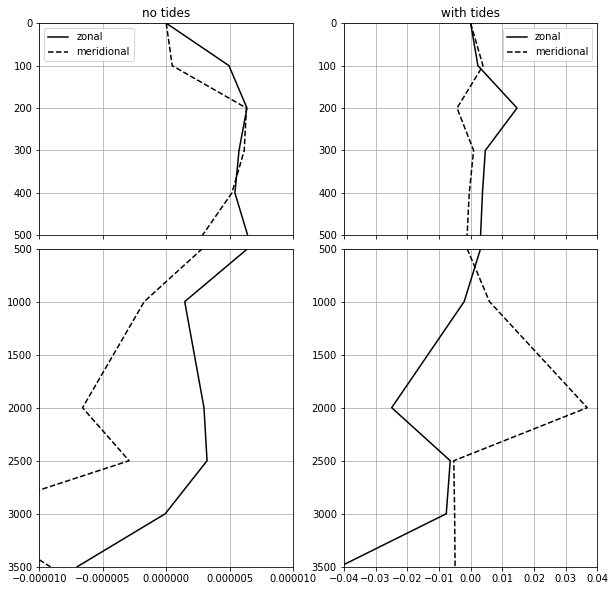

In [14]:
fig=plt.figure(figsize=(10,10))

gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[2, 3], hspace=0.05) 

ax = plt.subplot(gs[0])
levels=[0,100,200,300,400,500]
plt.plot(profile_xEPnotide[0:6],levels,'k-',label='zonal')
plt.plot(profile_yEPnotide[0:6],levels,'k--',label='meridional')
ax.set_ylim([500, 0])
ax.set_xlim([-1e-5, 1e-5])
ax.set_xticklabels([])
plt.yticks([0,100,200,300,400,500])
#plt.xticks([-2e-4,-1e-4,0,1e-4,2e-4])
plt.legend()
plt.title('no tides')
plt.grid(True)

ax = plt.subplot(gs[2])
levels=[500,1000,2000,2500,3000,3500]
plt.plot(profile_xEPnotide[5:],levels,'k-',label='zonal')
plt.plot(profile_yEPnotide[5:],levels,'k--',label='meridional')
plt.grid(True)
ax.set_ylim([3500, 500])
ax.set_xlim([-1e-5, 1e-5])
#plt.xticks([-2e-4,-1e-4,0,1e-4,2e-4])

ax = plt.subplot(gs[1])
levels=[0,100,200,300,400,500]
plt.plot(profile_xEPtide[0:6],levels,'k-',label='zonal')
plt.plot(profile_yEPtide[0:6],levels,'k--',label='meridional')
ax.set_ylim([500, 0])
ax.set_xlim([-4e-2, 4e-2])
#plt.xticks([-2e-3,-1e-3,0,1e-3,2e-3])
ax.set_xticklabels([])
plt.yticks([0,100,200,300,400,500])
plt.legend()
plt.title('with tides')
plt.grid(True)

ax = plt.subplot(gs[3])
levels=[500,1000,2000,2500,3000,3500]
plt.plot(profile_xEPtide[5:],levels,'k-',label='zonal')
plt.plot(profile_yEPtide[5:],levels,'k--',label='meridional')
ax.set_ylim([3500, 500])
ax.set_xlim([-4e-2, 4e-2])
#plt.xticks([-2e-3,-1e-3,0,1e-3,2e-3])
plt.grid(True)